# PART 3

In [1]:
import re
import nltk
from string import punctuation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import pandas as pd

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Populating the interactive namespace from numpy and matplotlib


In [2]:
raw = pd.read_csv("results_recent_wo_BQ.csv", sep="\t")
raw.drop(['Unnamed: 0'],axis=1,inplace=True)
print (raw.shape)
raw.head(10)

(5050, 3)


,Date,user_id,comments
0,"June 10, 2019 11:56PM",sda,Did he buy it at an Audi dealer? Are they tell...
1,"June 11, 2019 12:06AM",henryn,I'm surprised no one else has addressed this. ...
2,"June 11, 2019 12:46AM",roadburner,I loved my 1975.
3,"June 11, 2019 12:55AM",28firefighter,Not really looking to argue with you - he is a...
4,"June 11, 2019 1:20AM",qbrozen,"I agree with what you guys are saying, but, at..."
5,"June 11, 2019 1:31AM",Sandman6472,"So far, our 2015 A3 has been flawless. She own..."
6,"June 11, 2019 2:19AM",28firefighter,Punch for me. But it isn’t a car and doesn’t h...
7,"June 11, 2019 2:32AM",henryn,Not really looking to argue with you - he is a...
8,"June 11, 2019 2:45AM",pensfan83,Looks great @28firefighter
9,"June 11, 2019 2:49AM",28firefighter,Can you make out the second picture in? My fav...


In [3]:
# DATA CLEANSING

def remove_space(s):
    return s.replace("\n"," ")

def removepunc(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

def lowerize(x):
    return x.lower()

stop_words = set(stopwords.words('english'))

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 

def lematize(l):
    s=[]
    for i in l:
        i=i.lower()
        if i in modeldict:
            s.append(modeldict[i])
        else:
            s.append(wordnet_lemmatizer.lemmatize(i))
    return s


In [4]:
models = pd.read_csv("models.csv")
data = raw.copy()
data = data.dropna()
#data['comments'] = data['comments'].apply(removepunc).apply(lowerize).apply(remove_stopwords)
data['comments'] = data['comments'].apply(remove_space).apply(removepunc).apply(lowerize)
data.head()

,Date,user_id,comments
0,"June 10, 2019 11:56PM",sda,did he buy it at an audi dealer are they telli...
1,"June 11, 2019 12:06AM",henryn,im surprised no one else has addressed this ba...
2,"June 11, 2019 12:46AM",roadburner,i loved my 1975
3,"June 11, 2019 12:55AM",28firefighter,not really looking to argue with you he is a ...
4,"June 11, 2019 1:20AM",qbrozen,i agree with what you guys are saying but at t...


In [5]:
models = models.set_index("Model")
data_dict = models.to_dict() # converting to dict
modeldict=data_dict["Brand"]

wordnet_lemmatizer = WordNetLemmatizer()

data['comments_word'] = data['comments'].apply(word_tokenize).apply(set).apply(list)

data['comments_replace_model'] = data['comments_word'].apply(lematize).apply(set)

data['comments_final_words'] =  data['comments_replace_model'].apply(remove_stopwords)

data.head()

,Date,user_id,comments,comments_word,comments_replace_model,comments_final_words
0,"June 10, 2019 11:56PM",sda,did he buy it at an audi dealer are they telli...,"[him, it, are, they, pound, at, sand, buy, he,...","{him, it, are, they, pound, at, sand, buy, he,...","[pound, sand, buy, take, audi, telling, hopefu..."
1,"June 11, 2019 12:06AM",henryn,im surprised no one else has addressed this ba...,"[quick, i, when, one, going, surprised, limp, ...","{quick, i, thing, when, going, one, surprised,...","[quick, thing, going, one, surprised, limp, tc..."
2,"June 11, 2019 12:46AM",roadburner,i loved my 1975,"[i, loved, 1975, my]","{i, loved, 1975, my}","[loved, 1975]"
3,"June 11, 2019 12:55AM",28firefighter,not really looking to argue with you he is a ...,"[i, putting, well, on, you, is, don, it, with,...","{i, putting, well, on, you, is, don, it, with,...","[putting, well, given, friend, bought, party, ..."
4,"June 11, 2019 1:20AM",qbrozen,i agree with what you guys are saying but at t...,"[i, nuff, said, what, guys, the, audi, time, a...","{i, nuff, said, what, time, agree, guy, you, w...","[nuff, said, time, agree, guy, audi, saying]"


In [6]:
data.reset_index(inplace  = True)

In [7]:
word_bag = []
for i in range(data.shape[0]):
    word_bag += data['comments_final_words'][i]

#word_bag

word_freq = nltk.FreqDist(word_bag)

In [8]:
rslt = pd.DataFrame(word_freq.most_common(500),              
                    columns=['Word', 'Frequency'])
rslt.head()

,Word,Frequency
0,car,1084
1,wa,1078
2,’,1050
3,like,962
4,one,891


In [9]:
model_list = list(models["Brand"].drop_duplicates())
top_10_brands = rslt[rslt["Word"].isin(model_list)].reset_index(drop='True')[:10]
top_10_brands

,Word,Frequency
0,audi,236
1,volkswagen,226
2,honda,225
3,subaru,187
4,acura,175
5,toyota,173
6,chevrolet,166
7,volvo,163
8,bmw,140
9,hyundai,137


In [10]:
def check_co_occ(brand_A,brand_B,post):
    if(brand_A in post and brand_B in post):
        return 1;
    else:
        return 0;



In [11]:
comments = data['comments_final_words']


co_exist_num = {}
#model_list = list(models["Brand"].drop_duplicates())
model_list = list(top_10_brands['Word'])
for brand_A in model_list:
        for brand_B in model_list:
            co_exist_num[brand_A+","+brand_B] = 0



In [12]:
for comment in comments:
    for brand_A in model_list:
        for brand_B in model_list:
            co_exist_num[brand_A+","+brand_B]+=check_co_occ(brand_A,brand_B,comment)
        

In [13]:
mat = pd.DataFrame.from_dict(co_exist_num, orient = 'index').values.reshape(10,10)
df = pd.DataFrame(mat).set_index(pd.Series(top_10_brands['Word']))
df.columns = top_10_brands['Word']
df

Word,audi,volkswagen,honda,subaru,acura,toyota,chevrolet,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,236,42,25,12,18,7,11,20,11,11
volkswagen,42,226,28,19,15,13,15,11,9,23
honda,25,28,225,18,29,28,11,16,11,15
subaru,12,19,18,187,16,11,3,16,12,9
acura,18,15,29,16,175,10,4,28,12,10
toyota,7,13,28,11,10,173,15,5,6,14
chevrolet,11,15,11,3,4,15,166,5,4,9
volvo,20,11,16,16,28,5,5,163,9,12
bmw,11,9,11,12,12,6,4,9,140,5


In [14]:
N=len(comments)
lift=df

for i in range(10):
    for j in range(10):
        lift.iloc[i,j]=N*df.iloc[i,j]/(top_10_brands['Frequency'].iloc[i]*top_10_brands['Frequency'].iloc[j])
lift

Word,audi,volkswagen,honda,subaru,acura,toyota,chevrolet,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,21.300847,3.958565,2.366761,1.366899,2.190944,0.861884,1.411502,2.613601,1.673638,1.710287
volkswagen,3.958565,22.243363,2.768063,2.260021,1.906574,1.671467,2.009942,1.501086,1.429930,3.734287
honda,2.366761,2.768063,22.342222,2.150588,3.702425,3.616082,1.480509,2.193102,1.755460,2.446229
subaru,1.366899,2.260021,2.150588,26.882353,2.457815,1.709283,0.485826,2.638759,2.304202,1.765994
acura,2.190944,1.906574,3.702425,2.457815,28.725714,1.660446,0.692186,4.934479,2.462204,2.096767
toyota,0.861884,1.671467,3.616082,1.709283,1.660446,29.057803,2.625705,0.891344,1.245334,2.969411
chevrolet,1.411502,2.009942,1.480509,0.485826,0.692186,2.625705,30.283133,0.928930,0.865232,1.989403
volvo,2.613601,1.501086,2.193102,2.638759,4.934479,0.891344,0.928930,30.840491,1.982603,2.701357
bmw,1.673638,1.429930,1.755460,2.304202,2.462204,1.245334,0.865232,1.982603,35.907143,1.310480


In [15]:
lift_diss=1/lift

for i in range(10):
    lift_diss.iloc[i,i]=0
lift_diss

Word,audi,volkswagen,honda,subaru,acura,toyota,chevrolet,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,0.000000,0.252617,0.422518,0.731583,0.456424,1.160249,0.708465,0.382614,0.597501,0.584697
volkswagen,0.252617,0.000000,0.361263,0.442474,0.524501,0.598277,0.497527,0.666184,0.699335,0.267789
honda,0.422518,0.361263,0.000000,0.464989,0.270093,0.276542,0.675444,0.455975,0.569651,0.408793
subaru,0.731583,0.442474,0.464989,0.000000,0.406865,0.585041,2.058352,0.378966,0.433990,0.566253
acura,0.456424,0.524501,0.270093,0.406865,0.000000,0.602248,1.444699,0.202656,0.406140,0.476925
toyota,1.160249,0.598277,0.276542,0.585041,0.602248,0.000000,0.380850,1.121902,0.802997,0.336767
chevrolet,0.708465,0.497527,0.675444,2.058352,1.444699,0.380850,0.000000,1.076507,1.155759,0.502663
volvo,0.382614,0.666184,0.455975,0.378966,0.202656,1.121902,1.076507,0.000000,0.504387,0.370184
bmw,0.597501,0.699335,0.569651,0.433990,0.406140,0.802997,1.155759,0.504387,0.000000,0.763079


In [16]:
mat_lift=lift_diss.values
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import sklearn

MDS_cars = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')


dissimilarity = lift_diss
npos = MDS_cars.fit_transform(dissimilarity)

seed = np.random.RandomState(seed=99)
mds = manifold.MDS(n_components=2, max_iter=20000, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
x_mds= mds.fit(dissimilarity.astype(np.float32)).embedding_


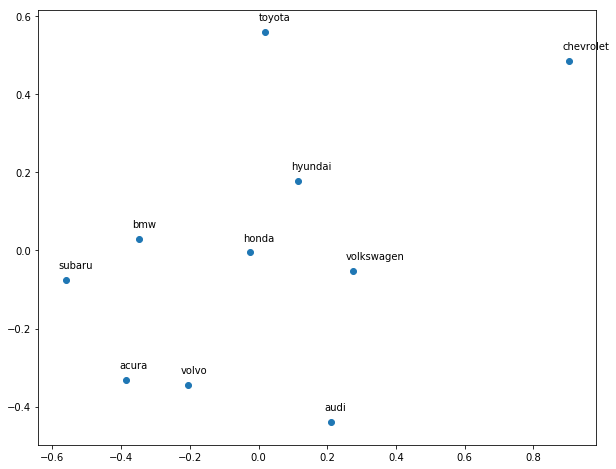

In [35]:
fig = plt.figure(figsize=(10, 8))
x=x_mds[:,0]
y=x_mds[:,1]

label=lift.columns.values
plt.scatter(x, y)
for i in range(10):
    plt.text(x[i]-0.02,y[i]+0.03,label[i])
plt.show()